# Background on Python, iPython, Jupyter and Pandas

[Python](https://www.python.org/) is a high-level general purpose programming language named after a [British comedy troup](https://www.youtube.com/user/MontyPython), created by a [Dutch benevolent dictator](http://en.wikipedia.org/wiki/Guido_van_Rossum) and maintained by an international group of fiendly but opinionated python enthusiasts (`import this!`). 

It's popular for data science because it's powerful, fast, plays well with others, runs everywhere, is easy to learn, highly readable, and open. Because it's general purpose it can be used for full-stack development. It's got a growing list of useful libraries for scientitic programming, data manipulation, data analysis. (Numpy, Scipy, Pandas, Scikit-Learn, Statsmodels, Matplotlib, Pybrain, etc.)

[iPython](http://ipython.org/) is an enhanced, interactive python interpreter started as a grad school project by [Fernando Perez](http://fperez.org/). iPython (jupyter) notebooks allow you to run a multi-language (Python, R, Julia, Markdown, LaTex, etc) interpreter in your browser to create rich, portable, and sharable code documents.

[Pandas](http://pandas.pydata.org/) is a libary created by [Wes McKinney](http://blog.wesmckinney.com/) that introduces the R-like dataframe object to Python and makes working with data in Python a lot easier. It's also a lot more efficient than the R dataframe and pretty much makes Python superior to R in every imaginable way (except for ggplot 2). 

## Getting started with Jupyter (iPython) Notebooks

To start up a Jupyter notebook server, simply navigate to the directory where you want the notebooks to be saved and run the command

```
jupyter notebook
```

A browser should open with a notebook navigator. Click the "New" button and select "Python 2".

A beautiful blank notebook should open in a new tab

Name the notebook by clicking on "Untitled" at the top of the page.

Notebooks are squences of cells. Cells can be markdown, code, or raw text. Change the first cell to markdown and briefly describe what you are going to do in the notebook. 

## Calling the Command Line from Jupyter

You can call the command line from jupyter! Just use a "!" before the command!

In [9]:
#Let's get data
!curl -O http://isalix.hestia.feralhosting.com/2016.csv.gz    
!gunzip 2016.csv.gz
!mv 2016.csv ~/data
!curl -O http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt
!mv ghcnd-stations.txt ~/data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74.9M  100 74.9M    0     0  1014k      0  0:01:15  0:01:15 --:--:-- 1339k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8461k  100 8461k    0     0  1760k      0  0:00:04  0:00:04 --:--:-- 1760k


## Getting started with Pandas

We start by importing the libraries we're going to use: `pandas` and `matplotlib`

In [5]:
# Import Statements
import pandas as pd
import numpy as np
%matplotlib inline

/Users/matthewgee/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
# File Locations
# Change these on your machine!
datadir = "/Users/matthewgee/data/"
weather_data_raw = datadir + "2016.csv"
station_data_raw = datadir + "ghcnd-stations.txt"

## Loading data into a Pandas DataFrame

So far we've been working with raw text files. That's one way to store and interact with data, but there are only a limited set of functions that can take as input raw text. Python has an amazing array of of data structures to work with that give you a lot of extra power in working with data. 

Build in Data Structures
- strings ""
- lists []
- tuples ()
- sets {}
- dictionaries {'key':value}

Additional Essential Data Structures

- numpy arrys ([])
- pandas Series
- pandas DataFrame
- tensorflow Tensors


Today we'll primarily be working with the pandas DataFrame. The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using Pandas' excellent `read_*` functions.

We're going to try two of them: read_table & read_csv

Pro tip: TAB COMPLETION!

Pro tip: jupyter will pull of the doc string for a command just by asking it a question.

Pro tip: jupyter will give you the allowable arguments if you it `shift + tab`

In [8]:
pd.read_table?

In [17]:
weather = pd.read_table(weather_data_raw, sep=",", header=None)
#weather = pd.read_csv(weather_data_raw)
stations = pd.read_table(station_data_raw, header=None)

## Viewing data in pandas

There are lots of options for viewing data in pandas. Just like we did in the command line, you can use `head` and `tail` to get a quick view of our data.

In [18]:
weather.head()

,0,1,2,3,4,5,6,7
0,US1FLSL0019,20160101,PRCP,3,NaN,NaN,N,NaN
1,USC00141761,20160101,TOBS,-89,NaN,NaN,7,700.0
2,USC00141761,20160101,PRCP,0,NaN,NaN,7,700.0
3,USC00141761,20160101,SNOW,0,NaN,NaN,7,NaN
4,USC00141761,20160101,SNWD,0,NaN,NaN,7,700.0


In [19]:
weather.tail()

,0,1,2,3,4,5,6,7
13255704,USR0000TSAB,20160601,TAVG,273,NaN,NaN,U,NaN
13255705,US1MIIS0004,20160601,PRCP,0,NaN,NaN,N,NaN
13255706,US1MIIS0004,20160601,SNOW,0,NaN,NaN,N,NaN
13255707,US1PALZ0025,20160601,PRCP,0,NaN,NaN,N,NaN
13255708,US1PALZ0025,20160601,SNOW,0,NaN,NaN,N,NaN


In [21]:
weather.shape

(13255709, 8)

In [22]:
weather.dtypes

0     object
1      int64
2     object
3      int64
4     object
5     object
6     object
7    float64
dtype: object

Pro tip: you'll notice that some commands have looked like pd.something(), some like data.something(), and some like data.something without (). The difference is a pandas function or class vs methods vs attributes. Methods are actions you take on a dataframe or series, while attributes are descriptors or the dataframe or series.


## Modifying your dataframe

Notice that we don't have column names and some columns are completely useless. Let's fix that by learning how to name and delete columns.

In [23]:
weather.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [25]:
#Get rid of 4,5,6, & 7
weather.drop([4,5,6,7], axis=1, inplace=True)

In [27]:
weather.head()

,0,1,2,3
0,US1FLSL0019,20160101,PRCP,3
1,USC00141761,20160101,TOBS,-89
2,USC00141761,20160101,PRCP,0
3,USC00141761,20160101,SNOW,0
4,USC00141761,20160101,SNWD,0


In [29]:
weather_cols = ['station_id','date','measurement','value']
weather.columns = weather_cols
weather.columns

Index([u'station_id', u'date', u'measurement', u'value'], dtype='object')

## Describing the entire dataframe

Now that we have columns, we want to get a better global view of our data. There are several ways 

In [32]:
weather.describe()

,date,value
count,1.325571e+07,1.325571e+07
mean,2.016030e+07,9.040353e+01
std,1.380050e+02,4.135585e+02
min,2.016010e+07,-9.990000e+02
25%,2.016020e+07,0.000000e+00
50%,2.016031e+07,1.000000e+00
75%,2.016042e+07,9.900000e+01
max,2.016060e+07,2.374900e+04


In [37]:
weather.describe(include=['O'])

,station_id,measurement
count,13255709,13255709
unique,36621,66
top,USC00218450,PRCP
freq,2853,3687627


## Selecting and subsetting in pandas

One of the biggest benefits of having a multi-index object like a DataFrame is the ability to easily select rows, columns, and subsets of the data. Let's learn how to do that.

First we will select individual series from the dataframe.

In [31]:
weather['measurement'].head()

0    PRCP
1    TOBS
2    PRCP
3    SNOW
4    SNWD
Name: measurement, dtype: object

In [41]:
#using . notation
weather.measurement.value_counts(normalize=True)

PRCP    2.781916e-01
TMAX    1.313235e-01
TMIN    1.305995e-01
SNOW    1.268957e-01
SNWD    9.313806e-02
TAVG    7.393501e-02
TOBS    5.633143e-02
WESD    1.434114e-02
AWND    1.119382e-02
WSF2    1.046198e-02
WDF2    1.046191e-02
WSF5    1.041695e-02
WDF5    1.041415e-02
WSFG    7.664245e-03
WESF    7.606232e-03
WDFG    7.586693e-03
WT01    3.833216e-03
PGTM    2.837117e-03
SX32    1.421802e-03
SN32    1.412373e-03
WT08    1.042419e-03
WT03    9.316740e-04
EVAP    8.541980e-04
WDMV    6.441753e-04
DAPR    6.317278e-04
MDPR    6.299927e-04
SX52    5.993644e-04
SN52    5.894819e-04
WT02    4.964653e-04
WSFI    3.923592e-04
            ...     
SN33    1.394116e-04
SX33    1.394116e-04
DWPR    1.344326e-04
WT04    1.339046e-04
WT11    1.155728e-04
MDTN    7.159179e-05
DATN    7.159179e-05
WT05    6.834791e-05
DATX    6.766896e-05
MDTX    6.766896e-05
SN53    6.125663e-05
SX53    6.125663e-05
SN51    5.469342e-05
SX51    5.461798e-05
SX35    4.488632e-05
WT09    3.854943e-05
SN35    3.575

In [51]:
#subset by row index
weather.measurement[3:10]

3    SNOW
4    SNWD
5    TMAX
6    TMIN
7    PRCP
8    TMAX
9    TMIN
Name: measurement, dtype: object

In [55]:
#Use the iloc method 
weather.iloc[10:20,2:4]

,measurement,value
10,TOBS,-61
11,PRCP,0
12,SNWD,279
13,TAVG,-104
14,WESD,610
15,TMAX,22
16,TMIN,-89
17,TMAX,-11
18,TMIN,-161
19,TOBS,-156


Now let's subset on row values.

In [42]:
#Create a boolean series based on a condition
weather['measurement']=='PRCP'

0            True
1           False
2            True
3           False
4           False
5           False
6           False
7            True
8           False
9           False
10          False
11           True
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20           True
21          False
22          False
23          False
24          False
25           True
26          False
27           True
28          False
29          False
            ...  
13255679     True
13255680    False
13255681     True
13255682    False
13255683    False
13255684    False
13255685     True
13255686     True
13255687     True
13255688    False
13255689    False
13255690    False
13255691    False
13255692    False
13255693    False
13255694     True
13255695    False
13255696    False
13255697    False
13255698    False
13255699    False
13255700    False
13255701     True
13255702    False
13255703  

In [44]:
#now pass that series to the datafram to subset it
rain = weather[weather['measurement']=='PRCP']
rain.head()

,station_id,date,measurement,value
0,US1FLSL0019,20160101,PRCP,3
2,USC00141761,20160101,PRCP,0
7,NOE00133566,20160101,PRCP,37
11,USS0018D08S,20160101,PRCP,0
20,USC00217184,20160101,PRCP,0


In [49]:
rain.sort_values('value', inplace=True, ascending=False)

/Users/matthewgee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
rain.head()

,station_id,date,measurement,value
10292284,ASN00040334,20160420,PRCP,11958
4922283,CA006012501,20160221,PRCP,9154
11826607,USS0017H07S,20160509,PRCP,8382
4365470,CA003013959,20160215,PRCP,6162
9346914,CA003013959,20160409,PRCP,6071


In [121]:
#Let's create a chicago tempurature dataset
chicago = weather[weather['station_id']=='USW00094846']
chicago_temp = weather[(weather['measurement']=='TAVG') & (weather['station_id']=='USW00094846')]
chicago_temp.head()

,station_id,date,measurement,value
46919,USW00094846,20160101,TAVG,-48
141015,USW00094846,20160102,TAVG,-28
235700,USW00094846,20160103,TAVG,-29
332026,USW00094846,20160104,TAVG,-28
429426,USW00094846,20160105,TAVG,-36


In [122]:
chicago_temp.sort_values('value').head()

,station_id,date,measurement,value
1678339,USW00094846,20160118,TAVG,-174
1005151,USW00094846,20160111,TAVG,-149
1775034,USW00094846,20160119,TAVG,-146
1200364,USW00094846,20160113,TAVG,-141
1583096,USW00094846,20160117,TAVG,-136


In [123]:
chicago_temp = chicago_temp[chicago_temp.value>-40]
chicago_temp.head()

,station_id,date,measurement,value
141015,USW00094846,20160102,TAVG,-28
235700,USW00094846,20160103,TAVG,-29
332026,USW00094846,20160104,TAVG,-28
429426,USW00094846,20160105,TAVG,-36
526497,USW00094846,20160106,TAVG,-21


## Applying functions to series and creating new columns

In [124]:
chicago_temp.value.mean()

73.518796992481199

In [125]:
chicago_temp.value.describe()

count    133.000000
mean      73.518797
std       71.502977
min      -36.000000
25%       18.000000
50%       68.000000
75%      122.000000
max      244.000000
Name: value, dtype: float64

In [126]:
#Apply user defined functions
def ftoc(temp_f):
    return (temp_f-32)*5/9

chicago_temp['TAVG_CEL']=chicago_temp.value.apply(ftoc)
chicago_temp.describe()

,date,value,TAVG_CEL
count,1.330000e+02,133.000000,133.000000
mean,2.016034e+07,73.518797,22.639098
std,1.374909e+02,71.502977,39.713813
min,2.016010e+07,-36.000000,-38.000000
25%,2.016022e+07,18.000000,-8.000000
50%,2.016033e+07,68.000000,20.000000
75%,2.016043e+07,122.000000,50.000000
max,2.016053e+07,244.000000,117.000000


Convert strings to datetime values

In [130]:
chicago_temp['datetime'] = pd.to_datetime(chicago_temp.date, format='%Y%m%d')
chicago_temp.dtypes

station_id             object
date                    int64
measurement            object
value                   int64
TAVG_CEL                int64
datetime       datetime64[ns]
dtype: object

Now we can plot the series with ease!

In [131]:
chicago_temp.head()

,station_id,date,measurement,value,TAVG_CEL,datetime
141015,USW00094846,20160102,TAVG,-28,-34,2016-01-02
235700,USW00094846,20160103,TAVG,-29,-34,2016-01-03
332026,USW00094846,20160104,TAVG,-28,-34,2016-01-04
429426,USW00094846,20160105,TAVG,-36,-38,2016-01-05
526497,USW00094846,20160106,TAVG,-21,-30,2016-01-06


## Groupby!
Groupby is a powerful method that makes it easy to peform operations on the dataframe by categorial values. Let's try generating a plot of min, max, and average temp over time.

In [132]:
chicago_temps = chicago[chicago.measurement.isin(['TMAX','TMIN','TAVG'])]
chicago_temps.measurement.value_counts()

TAVG    152
TMAX    150
TMIN    150
Name: measurement, dtype: int64

In [133]:
chicago_temps.groupby('measurement').value.mean()

measurement
TAVG    52.006579
TMAX    95.833333
TMIN     2.833333
Name: value, dtype: float64

In [134]:
chicago_temps.groupby('measurement').value.agg(['count','min','max','mean'])

,count,min,max,mean
measurement,,,,
TAVG,152,-174,244,52.006579
TMAX,150,-138,300,95.833333
TMIN,150,-199,189,2.833333


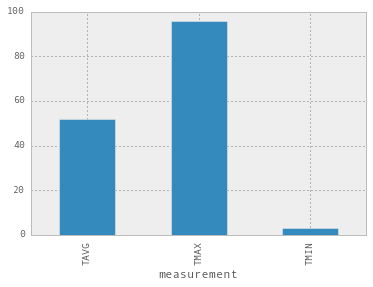

In [135]:
chicago_temps.groupby('measurement').value.mean().plot(kind='bar')

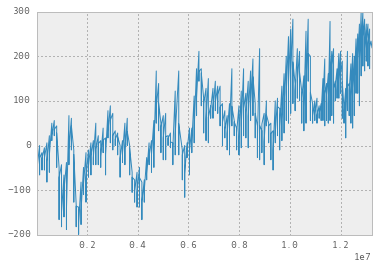

In [136]:
chicago_temps.value.plot()

In [138]:
chicago_temps['datetime'] = pd.to_datetime(chicago_temps.date, format='%Y%m%d')
chicago_temps.index = chicago_temps.datetime
chicago_temps.dtypes
chicago_temps.head()

/Users/matthewgee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,station_id,date,measurement,value,datetime
date,,,,,
2016-01-01,USW00094846,20160101,TMAX,-5,2016-01-01
2016-01-01,USW00094846,20160101,TMIN,-71,2016-01-01
2016-01-01,USW00094846,20160101,TAVG,-48,2016-01-01
2016-01-02,USW00094846,20160102,TMAX,0,2016-01-02
2016-01-02,USW00094846,20160102,TMIN,-66,2016-01-02


measurement
TAVG    Axes(0.125,0.125;0.775x0.775)
TMAX    Axes(0.125,0.125;0.775x0.775)
TMIN    Axes(0.125,0.125;0.775x0.775)
Name: value, dtype: object

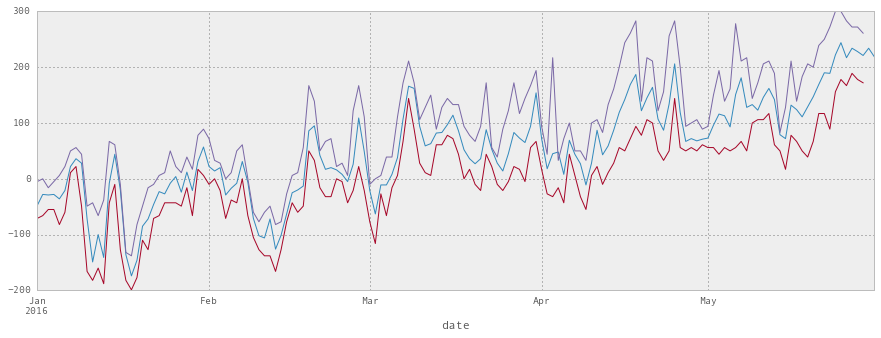

In [141]:
chicago_temps.groupby('measurement').value.plot(figsize=(15,5))